In [ ]:
# We will be investigating the change in the 3-dimensional shape
# of the dark matter distribution from the MW halo to the merger remnant halo.

# we are comparing initial MW halo shape at snapshot 000
# to remnant halo (MW+M31) shape at snapshot 700

In [ ]:
# new parts have ##

# get data from MW and M31 from snapshot 700
# rotate frame for coords in x, y, z
## add both MW and M31 particles from snapshot 700 together
##                        (this changed the two sigma contour but ellipse didn't change as much)
### created function to calculate the ellipse at two sigma--> might be wrong
## made 3 subplots with 1, 2, 3 sigma contours and overlayed the ellipse
## ellipse helps keep track of the a and b axes
## created 3d plots from snapshot 000 and 700 to see all axes at the same time to see any asymmetry

# stuff to try:
# different sd values: tried 0.8 and 0.9 but .95 (two sigma) 
#                      visually looks like it encaptures a significant portion
# different snapshots?
# look at distinguishable MW and M31 particles


# Issues:
# COM is off from 0,0,0?
# fig colorbar??
# at snapshot 700 we can see triaxial shape but adding the ellipse on top drowns it out

In [281]:
# set up lab7 code with density contour function templates

# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [282]:
import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level


def ellipse(x, y, ax, sigma):
    """
    Create a plot of the covariance confidence ellipse at a designated sigma contour line

    inputs:
            x:'numpy array'
               galaxy particle position in one coordinate 
            y:'numpy array'
               galaxy particle position in another coordinate

            ax : 'matplotlib axes'
                The axes object to draw the ellipse into.
            sigma: 'float'
                the number of the standard deviation we want
                

     Outputs:
            a:'float'
                semimajor axis length
            b:'float'
                semiminor axis length
    """
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    a = (np.sqrt(1 + pearson))/(sigma)/2
    b = (np.sqrt(1 - pearson))/(sigma)/2
    return a, b

# Code for plotting contours
#from https://gist.github.com/adrn/3993992

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    #onetwo_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.9))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    #new_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.98))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.68','0.95', '0.99'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
        
    return contour, two_sigma # return the sigma value we want for the ellipse curve


# snapshot 000

In [283]:
# Create a COM of object for MW Halo and disk Using Code from Assignment 4
COMD_MW_000 = CenterOfMass("MW_000.txt",1)
COMD_disk_MW_000 = CenterOfMass("MW_000.txt",2)

# Compute COM of MW using halo particles
COMP_MW_000 = COMD_MW_000.COM_P(0.1)
COMV_MW_000 = COMD_MW_000.COM_V(COMP_MW_000[0],COMP_MW_000[1],COMP_MW_000[2])
# Compute COM of MW using disk particles
COMP_disk_MW_000 = COMD_disk_MW_000.COM_P(0.1)
COMV_disk_MW_000 = COMD_disk_MW_000.COM_V(COMP_disk_MW_000[0],COMP_disk_MW_000[1],COMP_disk_MW_000[2])

In [284]:
# Determine positions of disk particles relative to COM 
xH_MW_000 = COMD_MW_000.x - COMP_MW_000[0].value 
yH_MW_000 = COMD_MW_000.y - COMP_MW_000[1].value 
zH_MW_000 = COMD_MW_000.z - COMP_MW_000[2].value 

# total magnitude
rtot = np.sqrt(xH_MW_000**2 + yH_MW_000**2 + zH_MW_000**2)

# Determine velocities of disk particles relative to COM motion
vxH_MW_000 = COMD_MW_000.vx - COMV_MW_000[0].value 
vyH_MW_000 = COMD_MW_000.vy - COMV_MW_000[1].value 
vzH_MW_000 = COMD_MW_000.vz - COMV_MW_000[2].value 

# total velocity 
vtot = np.sqrt(vxH_MW_000**2 + vyH_MW_000**2 + vzH_MW_000**2)

# Vectors for r and v 
rH_MW_000 = np.array([xH_MW_000,yH_MW_000,zH_MW_000]).T # transposed 
vH_MW_000 = np.array([vxH_MW_000,vyH_MW_000,vzH_MW_000]).T

In [285]:
# disk

# Determine positions of disk particles relative to COM 
xD_MW_000 = COMD_disk_MW_000.x - COMP_disk_MW_000[0].value 
yD_MW_000 = COMD_disk_MW_000.y - COMP_disk_MW_000[1].value 
zD_MW_000 = COMD_disk_MW_000.z - COMP_disk_MW_000[2].value 

# total magnitude
rtot = np.sqrt(xD_MW_000**2 + yD_MW_000**2 + zD_MW_000**2)

# Determine velocities of disk particles relative to COM motion
vxD_MW_000 = COMD_disk_MW_000.vx - COMV_disk_MW_000[0].value 
vyD_MW_000 = COMD_disk_MW_000.vy - COMV_disk_MW_000[1].value 
vzD_MW_000 = COMD_disk_MW_000.vz - COMV_disk_MW_000[2].value 

# total velocity 
vtot_d = np.sqrt(vxD_MW_000**2 + vyD_MW_000**2 + vzD_MW_000**2)

# Vectors for r and v 
rD_MW_000 = np.array([xD_MW_000,yD_MW_000,zD_MW_000]).T # transposed 
vD_MW_000 = np.array([vxD_MW_000,vyD_MW_000,vzD_MW_000]).T

2753.017196603232 2802.319575640078


(-5000.0, 5000.0)

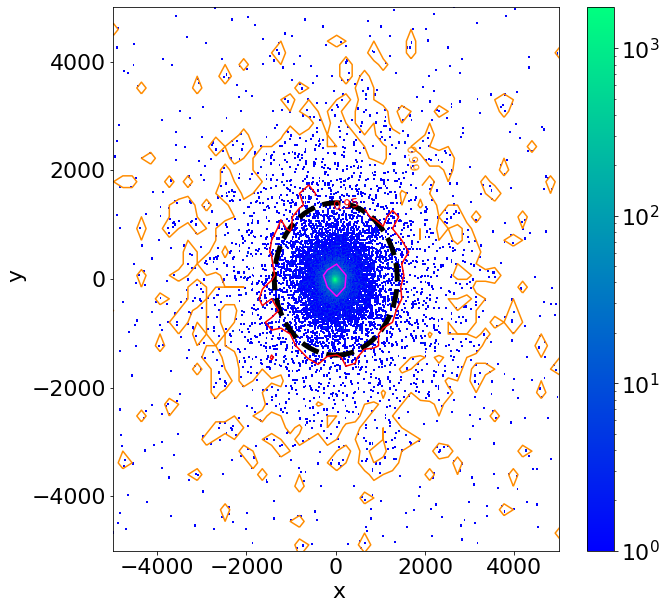

In [287]:
# 1) Make plots 

# MW halo Density 
fig, ax= plt.subplots(figsize=(10, 10))

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm, cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

X = rH_MW_000[:,0]
Y = rH_MW_000[:,1]
plt.hist2d(X, Y, bins=1000, norm=LogNorm(), cmap= 'winter')
#plt.hist2d(rD_MW_000[:,0], rD_MW_000[:,1], bins=500, norm=LogNorm(), cmap= 'plasma')

plt.colorbar()

# ADD HERE
# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# remember to adjust this if there are other contours added
# density_contour(pos1, pos2, res1, res2, ax=ax, colors=[])

contour, sigma = density_contour(xH_MW_000, yH_MW_000, 100,100,ax=ax, colors=['darkorange', 'red', 'fuchsia'])


# Add axis labels
plt.xlabel(' x', fontsize=22)
plt.ylabel(' y', fontsize=22)

#set axis limits
plt.ylim(-5000,5000)
plt.xlim(-5000,5000)

#plt.ylim(-30,30)
#plt.xlim(-30,30)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size



a, b = ellipse(X, Y, ax, sigma)
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax.add_patch(ellipses)

ax.set_xlim(-5000, 5000)
ax.set_ylim(-5000, 5000)

# Save to a file
#plt.savefig('plots/MW_halo.png')

In [288]:
def RotateFrame(posI,velI):
    """a function that will rotate the position and velocity vectors
    so that the disk angular momentum is aligned with z axis. 
    
    PARAMETERS
    ----------
        posI : `array of floats`
             3D array of positions (x,y,z)
        velI : `array of floats`
             3D array of velocities (vx,vy,vz)
             
    RETURNS
    -------
        pos: `array of floats`
            rotated 3D array of positions (x,y,z) such that disk is in the XY plane
        vel: `array of floats`
            rotated 3D array of velocities (vx,vy,vz) such that disk angular momentum vector
            is in the +z direction 
    """
    
    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    # normalize the vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


In [289]:
# compute the rotated velocity vectors
rnH_MW_000, vnH_MW_000 = RotateFrame(rH_MW_000,vH_MW_000)

x = rnH_MW_000[:,0]
y = rnH_MW_000[:,1]
z = rnH_MW_000[:,2]


2772.6904751573857 2782.8557666146153
2793.225433624877 2762.243719471514
2799.699523301378 2755.681634012671


(-5000.0, 5000.0)

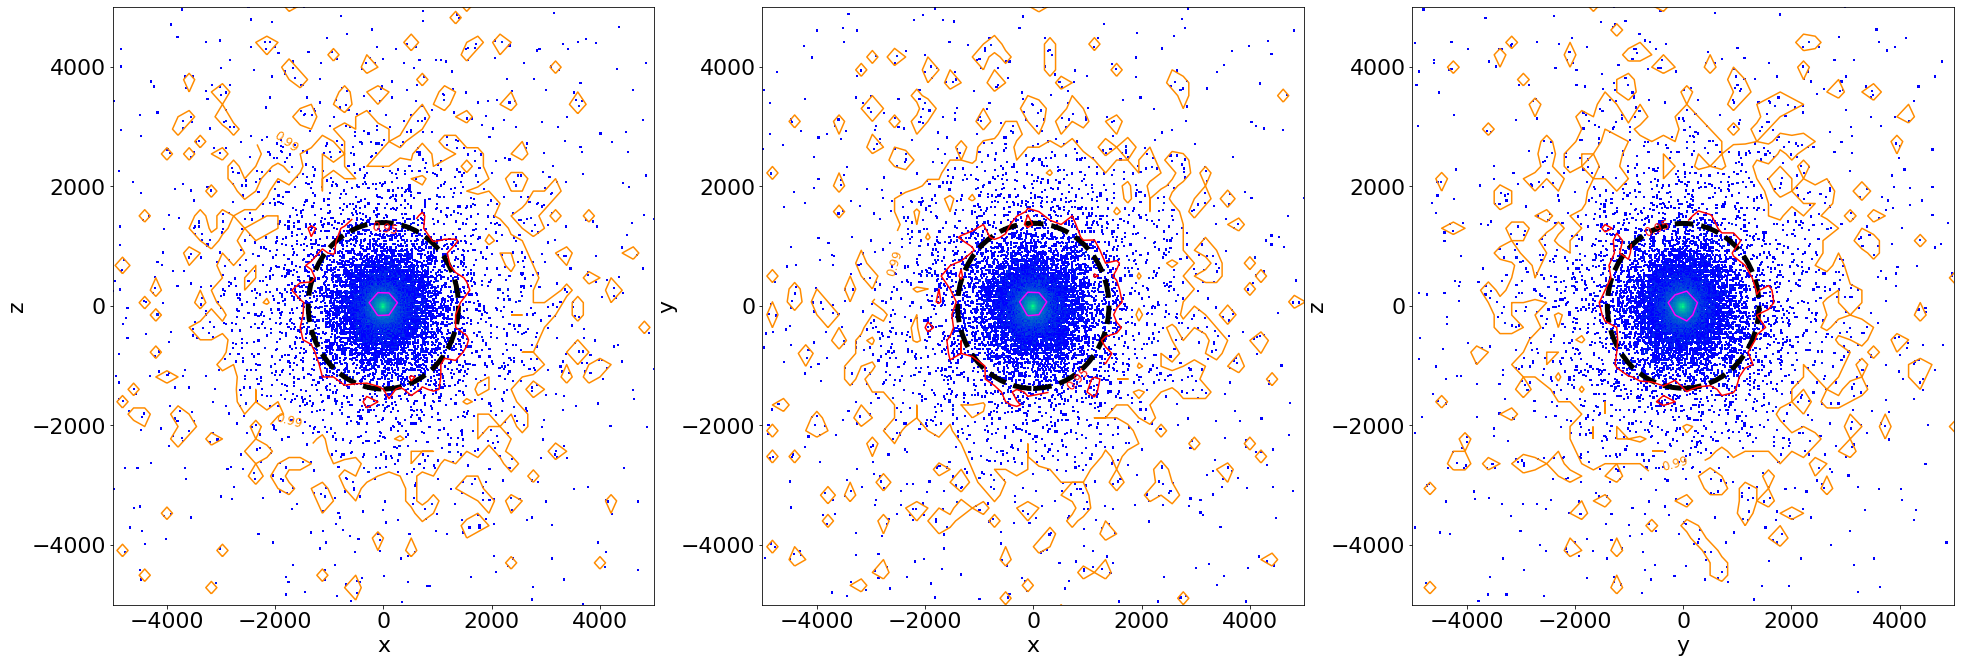

In [290]:
# Rotated MW halo


# MW halo Density 
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(33, 11))

# plot the particle density for MW , 2D histogram

###################### x, z ###########################################
ax1.hist2d(x, z, bins=1000, norm=LogNorm(), cmap= 'winter')

#fig.colorbar(ax1)

density_contour(x, z, 100,100,ax=ax1, colors=['darkorange', 'red', 'fuchsia'])

# Add axis labels
ax1.set_xlabel('x', fontsize=22)
ax1.set_ylabel('z', fontsize=22)

#set axis limits
ax1.set_ylim(-5000,5000)
ax1.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# creating ellipse curve
a, b = ellipse(x, z, ax1, sigma) # getting semimajor and minor axes
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax1.add_patch(ellipses)

ax1.set_xlim(-5000, 5000)
ax1.set_ylim(-5000, 5000)
####################### x, y ##########################################
ax2.hist2d(x, y, bins=1000, norm=LogNorm(), cmap= 'winter')

#fig.colorbar(ax1)

density_contour(x, y, 100,100,ax=ax2, colors=['darkorange', 'red', 'fuchsia'])


# Add axis labels
ax2.set_xlabel('x', fontsize=22)
ax2.set_ylabel('y', fontsize=22)

#set axis limits
ax2.set_ylim(-5000,5000)
ax2.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


a, b = ellipse(x, y, ax2, sigma)# getting semimajor and minor axes
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax2.add_patch(ellipses)

ax2.set_xlim(-5000, 5000)
ax2.set_ylim(-5000, 5000)



####################### y, z ##########################################
ax3.hist2d(y, z, bins=1000, norm=LogNorm(), cmap= 'winter')

#fig.colorbar(ax1)

density_contour(y, z, 100,100,ax=ax3, colors=['darkorange', 'red', 'fuchsia'])


# Add axis labels
ax3.set_xlabel('y', fontsize=22)
ax3.set_ylabel('z', fontsize=22)

#set axis limits
ax3.set_ylim(-5000,5000)
ax3.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


a, b = ellipse(y, z, ax3, sigma)# getting semimajor and minor axes
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax3.add_patch(ellipses)

ax3.set_xlim(-5000, 5000)
ax3.set_ylim(-5000, 5000)


# Save to a file
#plt.savefig('plots/XZ_Density.png')

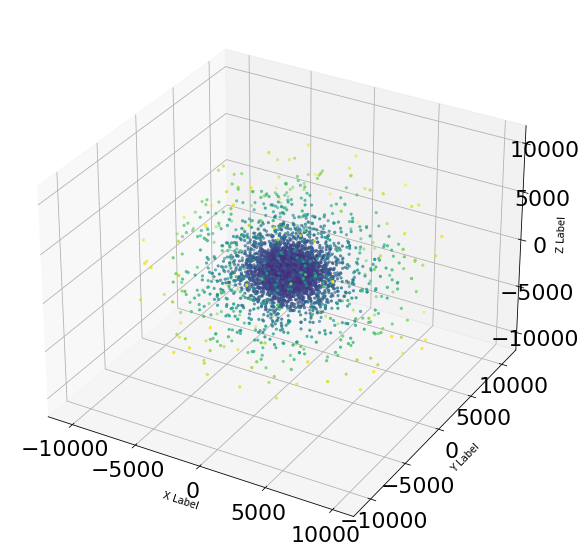

In [291]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, marker='.',c = np.sqrt(x**2+y**2+z**2), cmap= 'viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

2793.225433624877 2762.243719471514


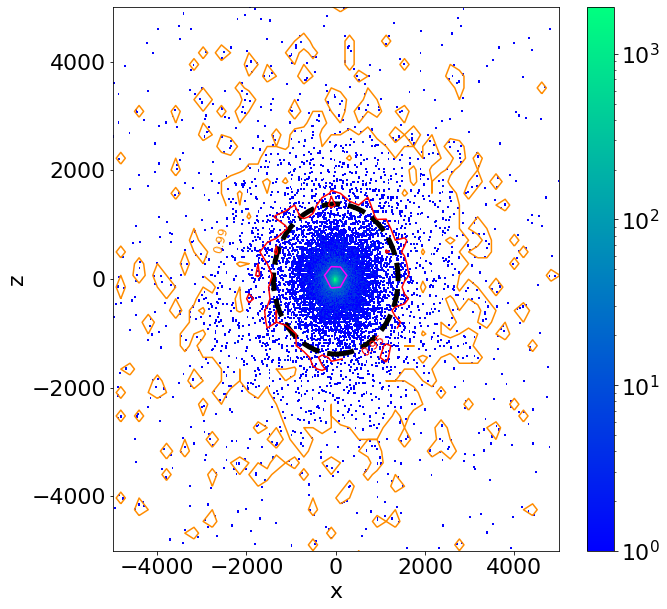

In [292]:
# Rotated MW - FACE ON

# MW halo Density 
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for M31 
#                  x,            y
plt.hist2d(x, y, bins=1000, norm=LogNorm(), cmap= 'winter')

plt.colorbar()

density_contour(x, y, 100,100,ax=ax, colors=['darkorange', 'red', 'fuchsia'])


# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE

# Add axis labels
plt.xlabel('x', fontsize=22)
plt.ylabel('z', fontsize=22)

#set axis limits
plt.ylim(-5000,5000)
plt.xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


a, b = ellipse(x, y, ax, sigma)
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax.add_patch(ellipses)

ax.set_xlim(-5000, 5000)
ax.set_ylim(-5000, 5000)

# Save to a file 
plt.savefig('plots/XY_Density.png')

2799.699523301378 2755.681634012671


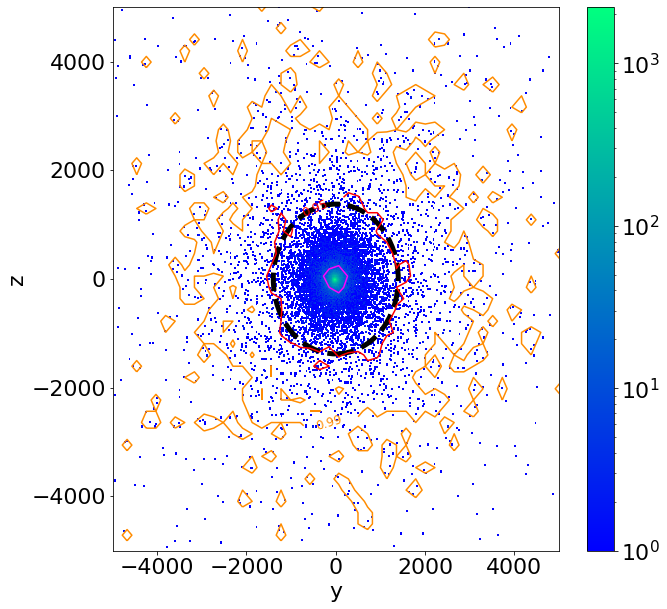

In [294]:
# Rotated MW - FACE ON

# MW halo Density 
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for M31 
#                  y,            z
plt.hist2d(y, z, bins=1000, norm=LogNorm(), cmap= 'winter')

plt.colorbar()

density_contour(y, z, 100,100,ax=ax, colors=['darkorange', 'red', 'fuchsia'])


# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE

# Add axis labels
plt.xlabel('y', fontsize=22)
plt.ylabel('z', fontsize=22)

#set axis limits
plt.ylim(-5000,5000)
plt.xlim(-5000,5000)


a, b = ellipse(y, z, ax, sigma)
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax.add_patch(ellipses)

ax.set_xlim(-5000, 5000)
ax.set_ylim(-5000, 5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Save to a file 
plt.savefig('plots/YZ_Density.png')

# snapshot 700

In [295]:
# Create a COM of object for MW at snapshot 700 Disk Using Code from Assignment 4
COMD_MW_700 = CenterOfMass("MW_700.txt",1)
COMD_disk_MW_700 = CenterOfMass("MW_700.txt",2)

# Compute COM of MW using halo particles
COMP_MW_700 = COMD_MW_700.COM_P(0.1)
COMV_MW_700 = COMD_MW_700.COM_V(COMP[0],COMP[1],COMP[2])
# Compute COM of MW using disk particles
#COMP_disk_MW_700 = COMD_disk_MW_700.COM_P(0.1)
#COMV_disk_MW_700 = COMD_disk_MW_700.COM_V(COMP_disk_MW_700[0],COMP_disk_MW_700[1],COMP_disk_MW_700[2])

# Create a COM of object for M31 Halo and Disk Using Code from Assignment 4
COMD_M31_700 = CenterOfMass("M31_700.txt",1)
#COMD_disk_M31_700 = CenterOfMass("M31_700.txt",2)

# Compute COM of M31 using halo particles
COMP_M31_700 = COMD_M31_700.COM_P(0.1)
COMV_M31_700 = COMD_M31_700.COM_V(COMP_M31_700[0],COMP_M31_700[1],COMP_M31_700[2])
# Compute COM of M31 using disk particles
#COMP_disk_M31_700 = COMD_disk_M31_700.COM_P(0.1)
#COMV_disk_M31_700 = COMD_disk_M31_700.COM_V(COMP_disk_M31_700[0],COMP_disk_M31_700[1],COMP_disk_M31_700[2])

In [335]:
# Determine positions of disk particles relative to COM 
xH_MW_700 = COMD_MW_700.x - COMP_MW_700[0].value 
yH_MW_700 = COMD_MW_700.y - COMP_MW_700[1].value 
zH_MW_700 = COMD_MW_700.z - COMP_MW_700[2].value 

# total magnitude
rtot = np.sqrt(xH_MW_700**2 + yH_MW_700**2 + zH_MW_700**2)

# Determine velocities of disk particles relative to COM motion
vxH_MW_700 = COMD_MW_700.vx - COMV_MW_700[0].value 
vyH_MW_700 = COMD_MW_700.vy - COMV_MW_700[1].value 
vzH_MW_700 = COMD_MW_700.vz - COMV_MW_700[2].value 

# total velocity 
vtotMW = np.sqrt(vxH_MW_700**2 + vyH_MW_700**2 + vzH_MW_700**2)

# Vectors for r and v 
rH_MW_700 = np.array([xH_MW_700,yH_MW_700,zH_MW_700]).T # transposed 
vH_MW_700 = np.array([vxH_MW_700,vyH_MW_700,vzH_MW_700]).T

In [336]:
# Determine positions of disk particles relative to COM 
xH_M31_700 = COMD_M31_700.x - COMP_M31_700[0].value 
yH_M31_700 = COMD_M31_700.y - COMP_M31_700[1].value 
zH_M31_700 = COMD_M31_700.z - COMP_M31_700[2].value 

# total magnitude
rtot = np.sqrt(xH_M31_700**2 + yH_M31_700**2 + zH_M31_700**2)

# Determine velocities of disk particles relative to COM motion
vxH_M31_700 = COMD_M31_700.vx - COMV_M31_700[0].value 
vyH_M31_700 = COMD_M31_700.vy - COMV_M31_700[1].value 
vzH_M31_700 = COMD_M31_700.vz - COMV_M31_700[2].value 

# total velocity 
vtot31 = np.sqrt(vxH_M31_700**2 + vyH_M31_700**2 + vzH_M31_700**2)

# Vectors for r and v 
rH_M31_700 = np.array([xH_M31_700,yH_M31_700,zH_M31_700]).T # transposed 
vH_M31_700 = np.array([vxH_M31_700,vyH_M31_700,vzH_M31_700]).T

In [337]:
print(COMP_MW_700[0].value, COMP_MW_700[1].value, COMP_MW_700[2].value)

print(COMP_M31_700[0].value, COMP_M31_700[1].value, COMP_M31_700[2].value)

147.09 53.8 110.34
145.96 53.6 109.19


2751.9660340036403 2803.3518574197888


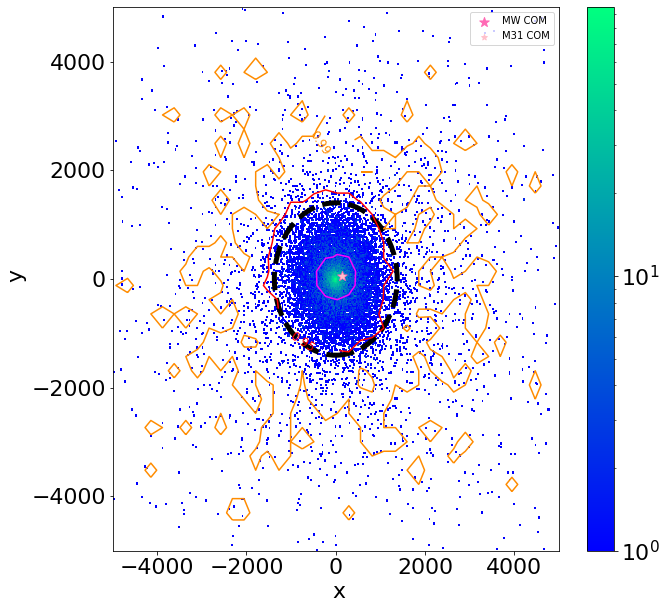

In [341]:
# 1) Make plots 

# MW halo Density 
fig, ax= plt.subplots(figsize=(10, 10))

# ADD HERE
# plot the particle density for M31 using a 2D historgram
# plt.hist2D(pos1,pos2, bins=, norm=LogNorm, cmap= )
# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
#   e.g. magma, viridis
# can modify bin number to make the plot smoother

plt.hist2d(rH_MW_700[:,0]+rH_M31_700[:,0], rH_MW_700[:,1]+rH_M31_700[:,1], bins=1000, norm=LogNorm(), cmap= 'winter')
#plt.hist2d(rD_MW_000[:,0], rD_MW_000[:,1], bins=500, norm=LogNorm(), cmap= 'plasma')

plt.colorbar()

plt.scatter(COMP_MW_700[0].value, COMP_MW_700[1].value, marker='*', color='hotpink',s=100, label='MW COM')
plt.scatter(COMP_M31_700[0].value, COMP_M31_700[1].value, marker='*', color='pink', label='M31 COM')


# ADD HERE
# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# remember to adjust this if there are other contours added
# density_contour(pos1, pos2, res1, res2, ax=ax, colors=[])

density_contour(xH_MW_700, yH_MW_700, 80,80,ax=ax, colors=['darkorange', 'red', 'fuchsia'])



# Add axis labels
plt.xlabel(' x', fontsize=22)
plt.ylabel(' y', fontsize=22)

#set axis limits
plt.ylim(-5000,5000)
plt.xlim(-5000,5000)


a, b = ellipse(xH_MW_700, yH_MW_700, ax, sigma)
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='--')

ax.add_patch(ellipses)

ax.set_xlim(-5000, 5000)
ax.set_ylim(-5000, 5000)

#plt.ylim(-30,30)
#plt.xlim(-30,30)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.legend()
# Save to a file
#plt.savefig('plots/MW_halo.png')

In [325]:
# compute the rotated velocity vectors
rnH_MW_700, vnH_MW_700 = RotateFrame(rH_MW_700,vH_MW_700)

rnH_M31_700, vnH_M31_700 = RotateFrame(rH_M31_700,vH_M31_700)

x_700 = rnH_MW_700[:,0]+rnH_M31_700[:,0]
y_700 = rnH_MW_700[:,1]+rnH_M31_700[:,1]
z_700 = rnH_MW_700[:,2]+rnH_M31_700[:,2]


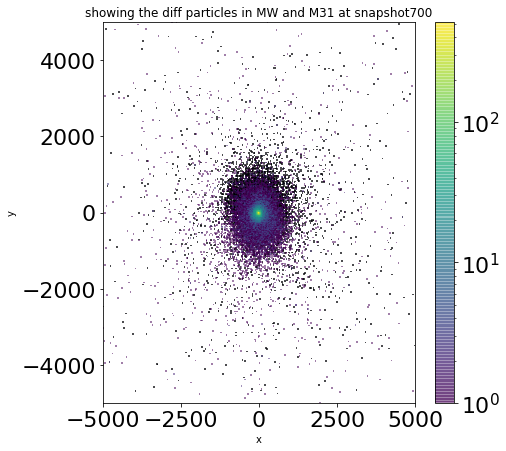

In [370]:
fig, ax= plt.subplots(figsize=(7,7))
plt.hist2d(rnH_MW_700[:,0], rnH_MW_700[:,1], bins=1000, norm=LogNorm(), cmap= 'magma', alpha=.7)
plt.hist2d(rnH_M31_700[:,0], rnH_M31_700[:,1], bins=1000, norm=LogNorm(), cmap= 'viridis', alpha=.5)
plt.colorbar()

plt.ylim(-5000,5000)
plt.xlim(-5000,5000)

plt.xlabel('x')
plt.ylabel('y')

plt.title('showing the diff particles in MW and M31 at snapshot700')
plt.show()

2789.140343008658 2766.3685285605484
2782.2448854159666 2773.3034609262295
2765.067012061429 2790.4306312141834


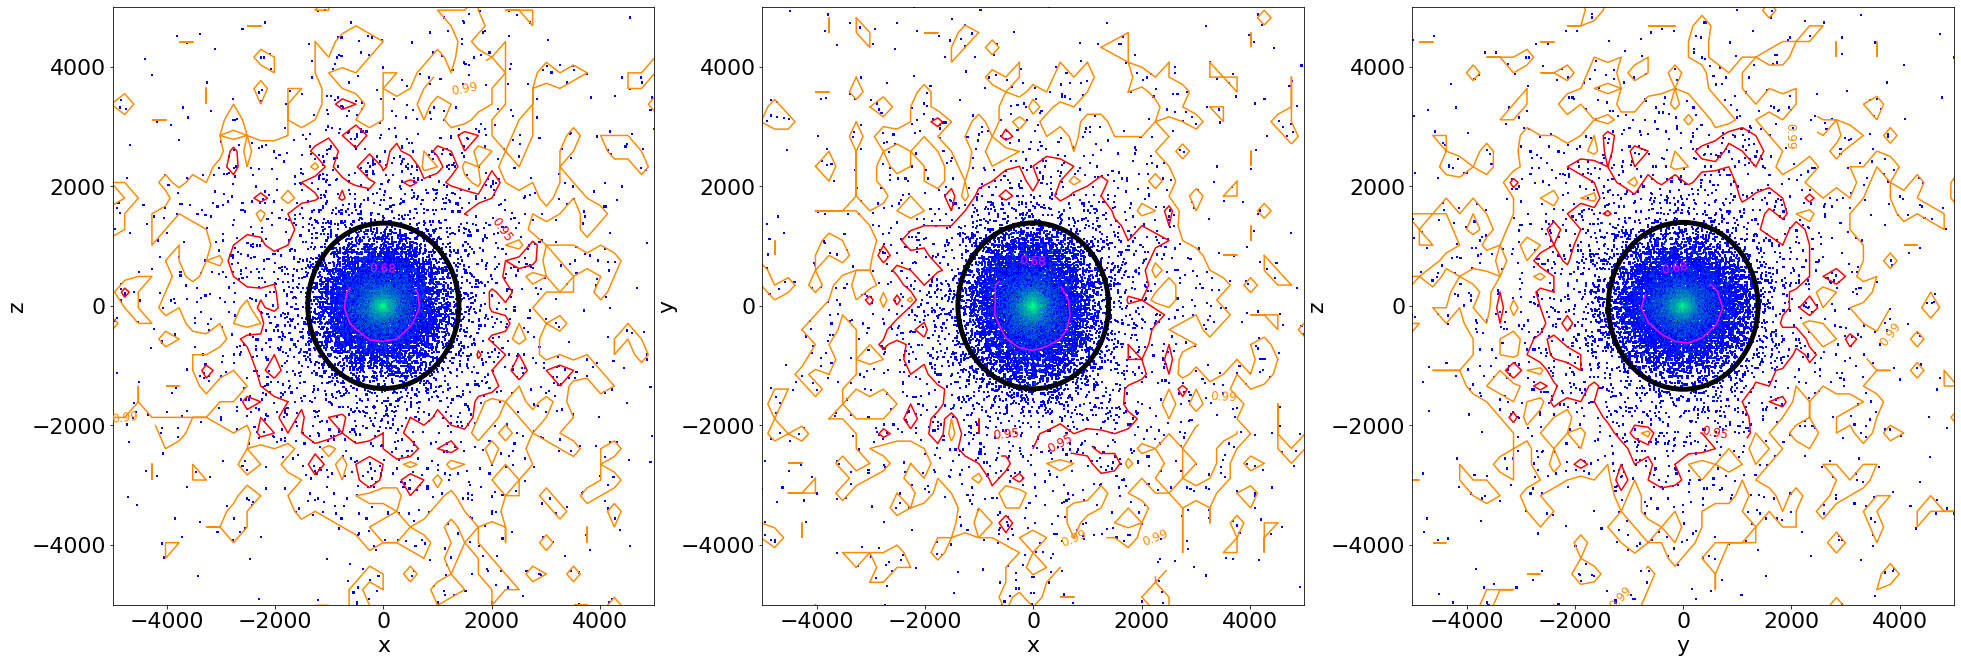

In [377]:
# Rotated MW halo- EDGE ON

# MW halo Density 
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(33, 11))

# plot the particle density for MW , 2D histogram
############################## x, z ################################################
ax1.hist2d(x_700, z_700, bins=1000, norm=LogNorm(), cmap= 'winter')

#plt.colorbar()

density_contour(x_700, z_700, 80,80,ax=ax1, colors=['darkorange', 'red', 'fuchsia'])

# Add axis labels
ax1.set_xlabel('x', fontsize=22)
ax1.set_ylabel('z', fontsize=22)

#set axis limits
ax1.set_ylim(-5000,5000)
ax1.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


a, b = ellipse(x_700, z_700, ax1, sigma)# getting semimajor and minor axes
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='-')

#ax1.add_patch(ellipses)

ax1.set_xlim(-5000, 5000)
ax1.set_ylim(-5000, 5000)

############################## x, y ################################################
ax2.hist2d(x_700, y_700, bins=1000, norm=LogNorm(), cmap= 'winter')

#plt.colorbar()

density_contour(x_700, y_700, 80,80,ax=ax2, colors=['darkorange','red', 'fuchsia'])

# Add axis labels
ax2.set_xlabel('x', fontsize=22)
ax2.set_ylabel('y', fontsize=22)

#set axis limits
ax2.set_ylim(-5000,5000)
ax2.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

a, b = ellipse(x_700, y_700, ax2, sigma)
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='-')

#ax2.add_patch(ellipses)

ax2.set_xlim(-5000, 5000)
ax2.set_ylim(-5000, 5000)

############################## y, z ################################################
ax3.hist2d(y_700, z_700, bins=1000, norm=LogNorm(), cmap= 'winter')

#plt.colorbar()

density_contour(y_700, z_700, 80,80,ax=ax3, colors=['darkorange', 'red', 'fuchsia'])

# Add axis labels
ax3.set_xlabel('y', fontsize=22)
ax3.set_ylabel('z', fontsize=22)

#set axis limits
ax3.set_ylim(-5000,5000)
ax3.set_xlim(-5000,5000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


a, b = ellipse(y_700, z_700, ax3, sigma)# getting semimajor and minor axes
print(a, b)
    
ellipses = Ellipse((0, 0),
    width=a,
    height=b,
    edgecolor='k', fc='None', lw=5, linestyle='-')

#ax3.add_patch(ellipses)

ax3.set_xlim(-5000, 5000)
ax3.set_ylim(-5000, 5000)


# Save to a file
#plt.savefig('plots/MW_M31_700_3subplots_Density.png')

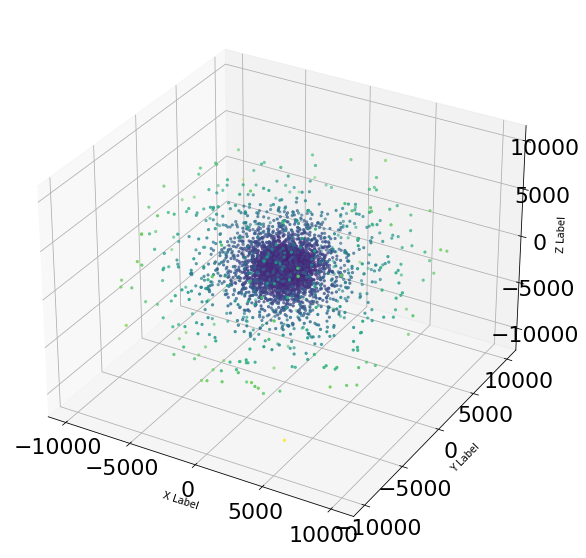

In [373]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_700, y_700, z_700, marker='.',c = np.sqrt(x_700**2+y_700**2+z_700**2), cmap= 'viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#adjust tick label font size
#label_size = 22
#matplotlib.rcParams['xtick.labelsize'] = label_size 
#matplotlib.rcParams['ytick.labelsize'] = label_size


plt.savefig('plots/MW_M31_700_3D_Density.png')